# Heart failure clinical records


Thirteen (13) clinical features:

- **age**: age of the patient (years)

- **anaemia**: decrease of red blood cells or hemoglobin (boolean)

- **creatinine phosphokinase  (CPK)**: level of the CPK enzyme in the blood (mcg/L)  (creatine turns into phosphocreatine — a high-energy substance used by your body to generate energy)

- **diabetes**: if the patient has diabetes (boolean)
- **ejection fraction**: percentage of blood leaving the heart at each contraction  (percentage)(kalbin her atisinda pompalanan kanin toplam kana orani)
- **high blood pressure**: if the patient has hypertension (boolean)
- **platelets**: platelets in the blood (kiloplatelets/mL) (pihtilasmayi saglayan sey)
- **sex**: woman or man (binary)
- **serum creatinine**: level of serum creatinine in the blood (mg/dL) (Creatinine is a waste product in your blood that comes from your muscles. Healthy kidneys filter creatinine out of your blood through your urine.)
- **serum sodium**: level of serum sodium in the blood (mEq/L)  (Doctors diagnose hypernatremia when the concentration of sodium in blood serum is higher than 145 milliequivalents per liter (mEq/l) . Two common causes of hypernatremia are not enough fluid intake and too much water loss. In rare cases, consuming too much sodium can cause hypernatremia.)
- **smoking**: if the patient smokes or not (boolean)
- **time**: follow-up period (days)
- **[target] death event**: if the patient died during the follow-up period (boolean)
Regarding the dataset imbalance, the survived patients (death event = 0) are 203, while the dead patients (death event = 1) are 96. In statistical terms, there are 32.11% positives and 67.89% negatives.

For more information, please check Table 1, Table 2, and Table 3 of the following paper: 

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5 

Donated on 2/4/2020

## Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf   # !pip install cufflinks

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



from sklearn.pipeline import Pipeline

from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import make_scorer

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



## Exploratory Data Analysis and Visualization

In [5]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [6]:
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75.000        0                       582         0                 20   
1   55.000        0                      7861         0                 38   
2   65.000        0                       146         0                 20   
3   50.000        1                       111         0                 20   
4   65.000        1                       160         1                 20   
..     ...      ...                       ...       ...                ...   
294 62.000        0                        61         1                 38   
295 55.000        0                      1820         0                 38   
296 45.000        0                      2060         1                 60   
297 45.000        0                      2413         0                 38   
298 50.000        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1 265000.000             1.900           130    1   
1                      0 263358.030             1.100           136    1   
2                      0 162000.000             1.300           129    1   
3                      0 210000.000             1.900           137    1   
4                      0 327000.000             2.700           116    0   
..                   ...        ...               ...           ...  ...   
294                    1 155000.000             1.100           143    1   
295                    0 270000.000             1.200           139    0   
296                    0 742000.000             0.800           138    0   
297                    0 140000.000             1.400           140    1   
298                    0 395000.000             1.600           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [7]:
df.shape

(299, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
df.describe().T

count       mean       std       min        25%  \
age                      299.000     60.834    11.895    40.000     51.000   
anaemia                  299.000      0.431     0.496     0.000      0.000   
creatinine_phosphokinase 299.000    581.839   970.288    23.000    116.500   
diabetes                 299.000      0.418     0.494     0.000      0.000   
ejection_fraction        299.000     38.084    11.835    14.000     30.000   
high_blood_pressure      299.000      0.351     0.478     0.000      0.000   
platelets                299.000 263358.029 97804.237 25100.000 212500.000   
serum_creatinine         299.000      1.394     1.035     0.500      0.900   
serum_sodium             299.000    136.625     4.412   113.000    134.000   
sex                      299.000      0.649     0.478     0.000      0.000   
smoking                  299.000      0.321     0.468     0.000      0.000   
time                     299.000    130.261    77.614     4.000     73.000   
DEATH_EVENT              299.000      0.321     0.468     0.000      0.000   

                                50%        75%        max  
age                          60.000     70.000     95.000  
anaemia                       0.000      1.000      1.000  
creatinine_phosphokinase    250.000    582.000   7861.000  
diabetes                      0.000      1.000      1.000  
ejection_fraction            38.000     45.000     80.000  
high_blood_pressure           0.000      1.000      1.000  
platelets                262000.000 303500.000 850000.000  
serum_creatinine              1.100      1.400      9.400  
serum_sodium                137.000    140.000    148.000  
sex                           1.000      1.000      1.000  
smoking                       0.000      1.000      1.000  
time                        115.000    203.000    285.000  
DEATH_EVENT                   0.000      1.000      1.000

In [11]:
df_copy = df.copy()

In [12]:
df.columns.value_counts()

age                         1
anaemia                     1
creatinine_phosphokinase    1
diabetes                    1
ejection_fraction           1
high_blood_pressure         1
platelets                   1
serum_creatinine            1
serum_sodium                1
sex                         1
smoking                     1
time                        1
DEATH_EVENT                 1
Name: count, dtype: int64

In [13]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [14]:
df.select_dtypes(include="object")

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[299 rows x 0 columns]

In [15]:
df.corr()

age  anaemia  creatinine_phosphokinase  diabetes  \
age                       1.000    0.088                    -0.082    -0.101   
anaemia                   0.088    1.000                    -0.191    -0.013   
creatinine_phosphokinase -0.082   -0.191                     1.000    -0.010   
diabetes                 -0.101   -0.013                    -0.010     1.000   
ejection_fraction         0.060    0.032                    -0.044    -0.005   
high_blood_pressure       0.093    0.038                    -0.071    -0.013   
platelets                -0.052   -0.044                     0.024     0.092   
serum_creatinine          0.159    0.052                    -0.016    -0.047   
serum_sodium             -0.046    0.042                     0.060    -0.090   
sex                       0.065   -0.095                     0.080    -0.158   
smoking                   0.019   -0.107                     0.002    -0.147   
time                     -0.224   -0.141                    -0.009     0.034   
DEATH_EVENT               0.254    0.066                     0.063    -0.002   

                          ejection_fraction  high_blood_pressure  platelets  \
age                                   0.060                0.093     -0.052   
anaemia                               0.032                0.038     -0.044   
creatinine_phosphokinase             -0.044               -0.071      0.024   
diabetes                             -0.005               -0.013      0.092   
ejection_fraction                     1.000                0.024      0.072   
high_blood_pressure                   0.024                1.000      0.050   
platelets                             0.072                0.050      1.000   
serum_creatinine                     -0.011               -0.005     -0.041   
serum_sodium                          0.176                0.037      0.062   
sex                                  -0.148               -0.105     -0.125   
smoking                              -0.067               -0.056      0.028   
time                                  0.042               -0.196      0.011   
DEATH_EVENT                          -0.269                0.079     -0.049   

                          serum_creatinine  serum_sodium    sex  smoking  \
age                                  0.159        -0.046  0.065    0.019   
anaemia                              0.052         0.042 -0.095   -0.107   
creatinine_phosphokinase            -0.016         0.060  0.080    0.002   
diabetes                            -0.047        -0.090 -0.158   -0.147   
ejection_fraction                   -0.011         0.176 -0.148   -0.067   
high_blood_pressure                 -0.005         0.037 -0.105   -0.056   
platelets                           -0.041         0.062 -0.125    0.028   
serum_creatinine                     1.000        -0.189  0.007   -0.027   
serum_sodium                        -0.189         1.000 -0.028    0.005   
sex                                  0.007        -0.028  1.000    0.446   
smoking                             -0.027         0.005  0.446    1.000   
time                                -0.149         0.088 -0.016   -0.023   
DEATH_EVENT                          0.294        -0.195 -0.004   -0.013   

                           time  DEATH_EVENT  
age                      -0.224        0.254  
anaemia                  -0.141        0.066  
creatinine_phosphokinase -0.009        0.063  
diabetes                  0.034       -0.002  
ejection_fraction         0.042       -0.269  
high_blood_pressure      -0.196        0.079  
platelets                 0.011       -0.049  
serum_creatinine         -0.149        0.294  
serum_sodium              0.088       -0.195  
sex                      -0.016       -0.004  
smoking                  -0.023       -0.013  
time                      1.000       -0.527  
DEATH_EVENT              -0.527        1.000

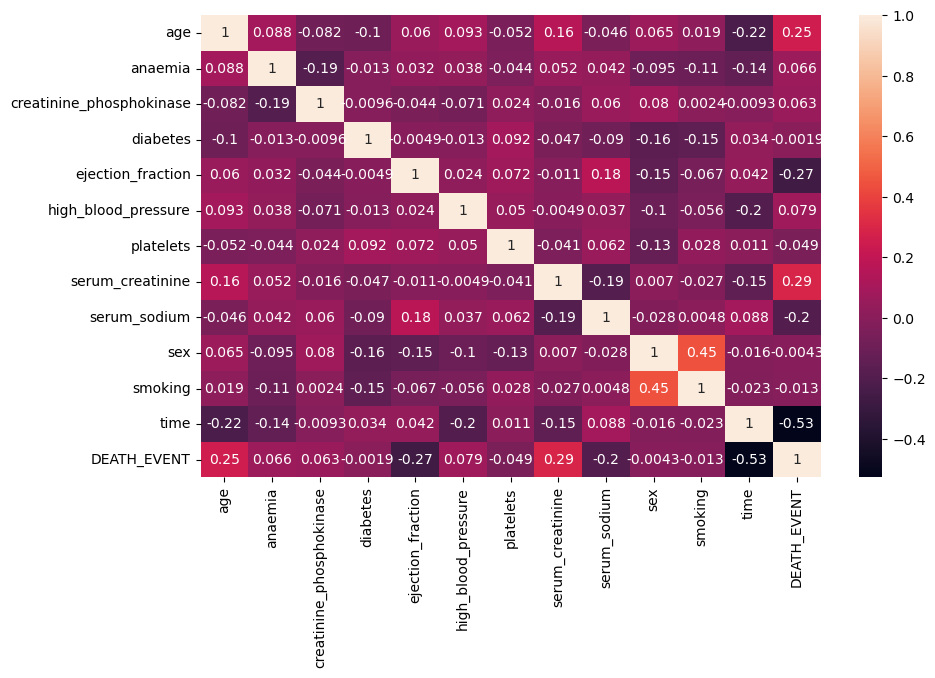

In [16]:
sns.heatmap(df.corr(), annot=True);

In [17]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [18]:
df['DEATH_EVENT'].value_counts(normalize=True)

DEATH_EVENT
0   0.679
1   0.321
Name: proportion, dtype: float64

In [19]:
sns.countplot(data = df, x = "DEATH_EVENT");

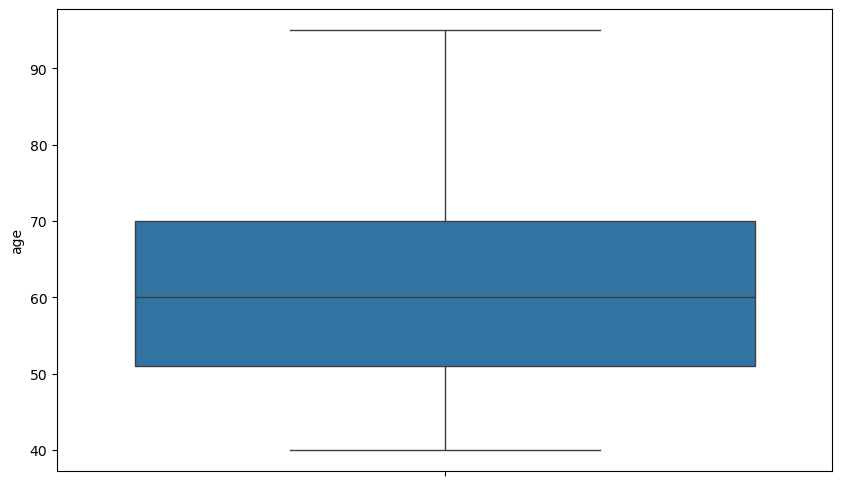

In [20]:
sns.boxplot(data =df, y="age");

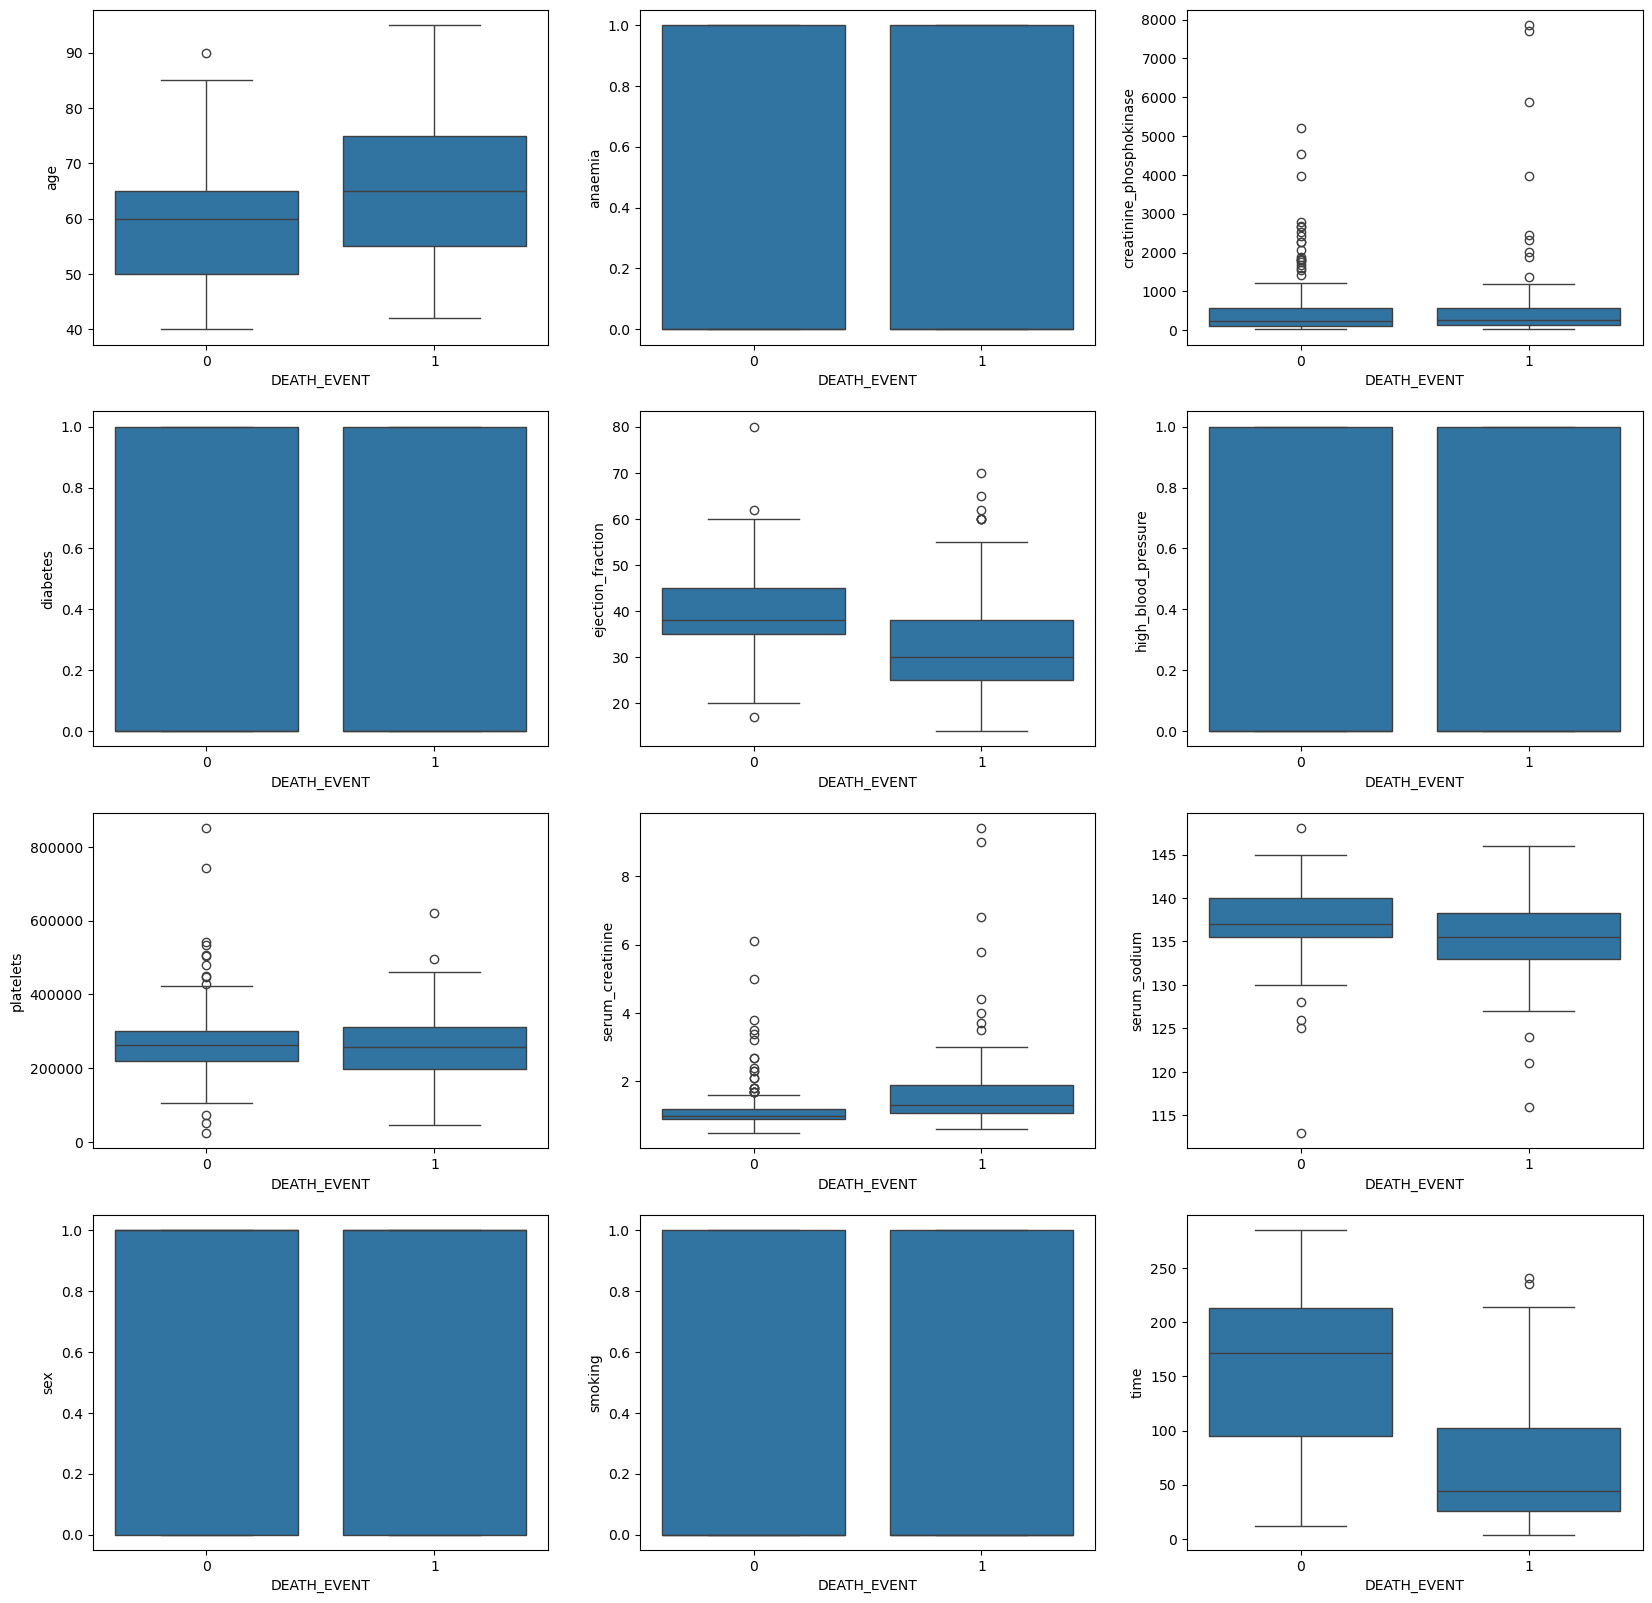

In [21]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "DEATH_EVENT":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='DEATH_EVENT',y=feature,data=df)
plt.show()

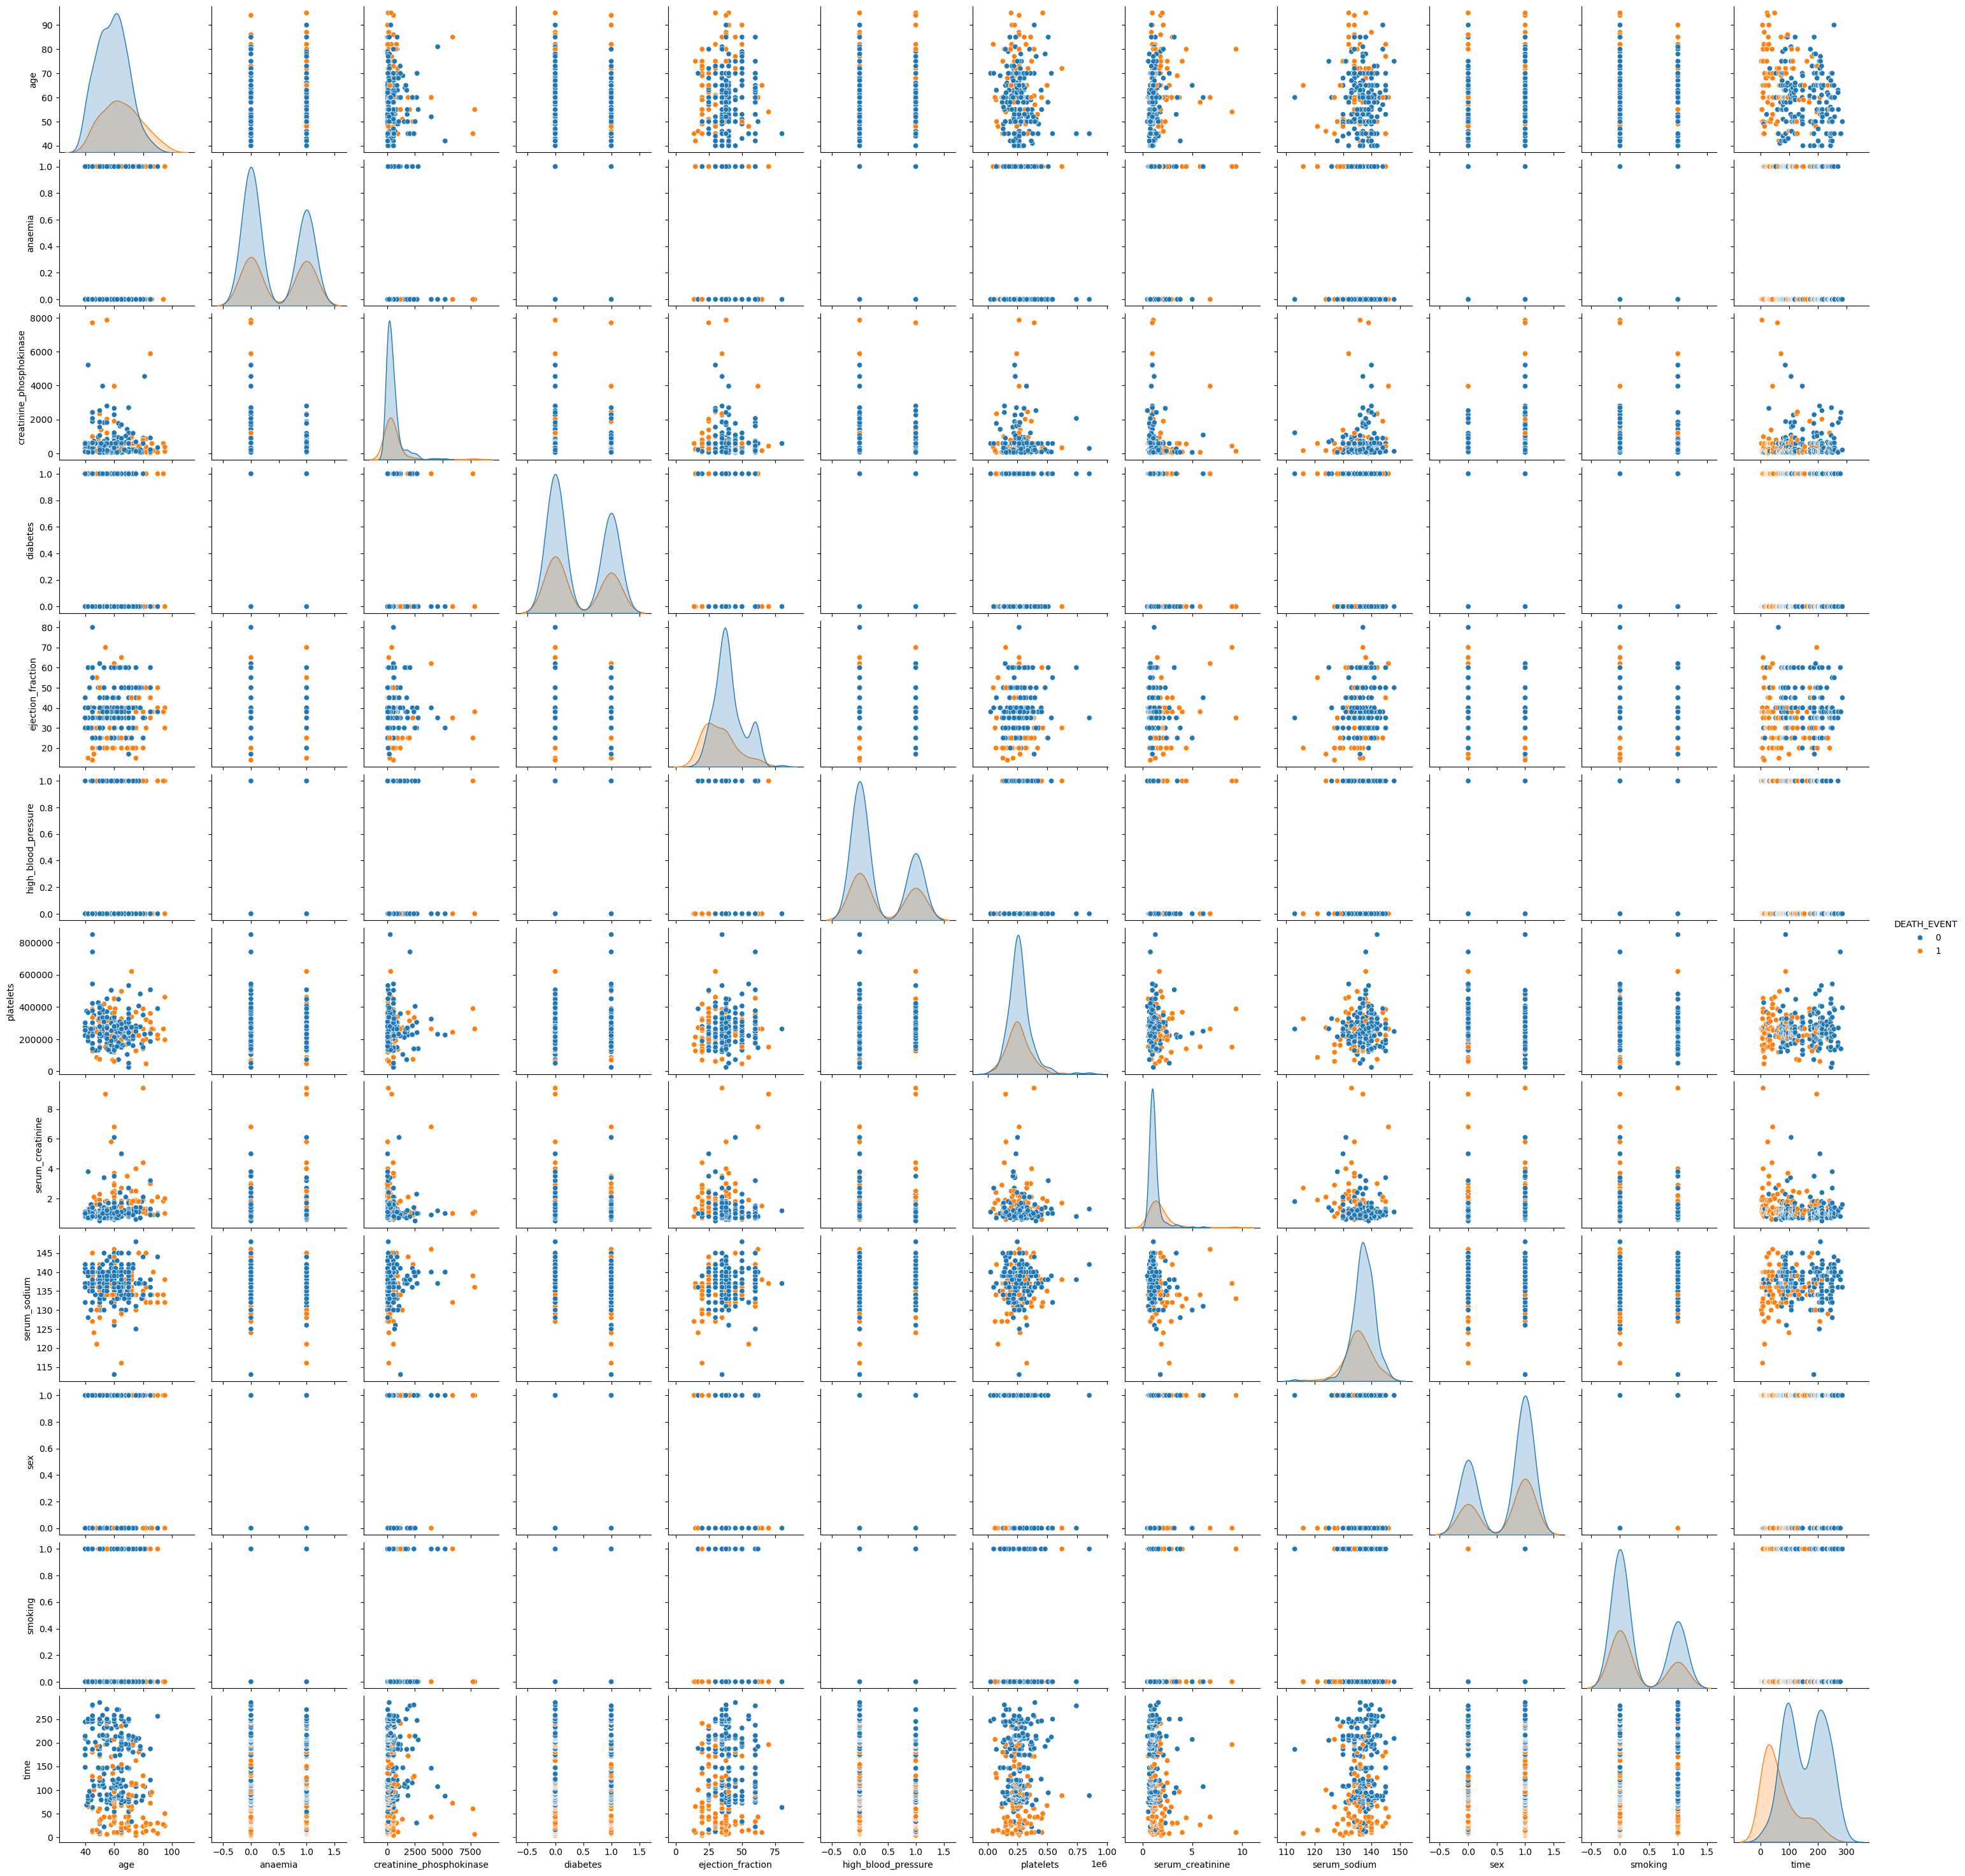

In [22]:
sns.pairplot(df, hue = "DEATH_EVENT");

## Train | Test Split and Scaling

In [23]:
X = df.drop(["DEATH_EVENT"], axis=1)
y = df.DEATH_EVENT

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    stratify=y, 
                                                    random_state = 102)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Modeling - Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [28]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [29]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(6)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
247 64.000        0                       143         0                 25   
155 60.000        1                       231         1                 25   
94  58.000        0                       144         1                 38   
149 60.000        0                      2261         0                 35   
109 45.000        0                       292         1                 35   
223 47.000        0                       582         0                 25   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
247                    0 246000.000             2.400           135    1   
155                    0 194000.000             1.700           140    1   
94                     1 327000.000             0.700           142    0   
149                    1 228000.000             0.900           136    1   
109                    0 850000.000             1.300           142    1   
223                    0 130000.000             0.800           134    1   

     smoking  time  DEATH_EVENT  pred  pred_proba  
247        0   214            0     0       0.361  
155        0   120            0     1       0.569  
94         0    83            0     0       0.253  
149        0   115            0     0       0.441  
109        1    88            0     0       0.167  
223        0   201            0     0       0.254

## Model Performance

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [32]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[48 13]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.83        61
           1       0.64      0.79      0.71        29

    accuracy                           0.79        90
   macro avg       0.76      0.79      0.77        90
weighted avg       0.81      0.79      0.79        90


Train_Set
[[115  27]
 [ 14  53]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       142
           1       0.66      0.79      0.72        67

    accuracy                           0.80       209
   macro avg       0.78      0.80      0.78       209
weighted avg       0.82      0.80      0.81       209



## Cross Validate

In [33]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.736
test_recall      0.595
test_f1          0.638
test_accuracy    0.799
dtype: float64

In [34]:
df_scores.mean()[2:]

test_precision   0.736
test_recall      0.595
test_f1          0.638
test_accuracy    0.799
dtype: float64

## GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
model = LogisticRegression(max_iter = 100, random_state = 42, class_weight='balanced')

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10) #katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]


param_grid = {"penalty": penalty,
             "C": C,
             "class_weight":class_weight,
             "solver": solver}

grid_model = GridSearchCV(estimator = model, 
                          param_grid = param_grid, 
                          cv = 10, scoring = "recall", 
                          n_jobs = -1)

In [37]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [38]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [39]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[41 20]
 [ 4 25]]
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        61
           1       0.56      0.86      0.68        29

    accuracy                           0.73        90
   macro avg       0.73      0.77      0.72        90
weighted avg       0.80      0.73      0.74        90


Train_Set
[[98 44]
 [ 8 59]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       142
           1       0.57      0.88      0.69        67

    accuracy                           0.75       209
   macro avg       0.75      0.79      0.74       209
weighted avg       0.81      0.75      0.76       209



In [69]:
grid_model.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [71]:
from sklearn.model_selection import cross_validate

model = LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores_log = pd.DataFrame(scores, index = range(1, 11))
df_scores_log.mean()[2:]

test_precision   0.571
test_recall      0.833
test_f1          0.670
test_accuracy    0.727
dtype: float64

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [40]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

In [41]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test);

In [42]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test_scaled, y_test);

In [43]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:, 1])

0.8864830775698971

In [44]:
fp_rate, tp_rate, tresholds = roc_curve(y_train, y_pred_proba[:, 1])

In [45]:
fp_tp_th = fp_rate, tp_rate, tresholds = roc_curve(y_train, y_pred_proba[:, 1]) 
df_fp_tp_th = pd.DataFrame(fp_tp_th)
df_fp_tp_th

0     1     2     3     4     5     6     7     8     9   ...    45  \
0 0.000 0.000 0.000 0.007 0.007 0.014 0.014 0.035 0.035 0.042  ... 0.380   
1 0.000 0.015 0.194 0.194 0.254 0.254 0.448 0.448 0.463 0.463  ... 0.925   
2   inf 0.985 0.868 0.864 0.846 0.845 0.792 0.784 0.769 0.748  ... 0.458   

     46    47    48    49    50    51    52    53    54  
0 0.387 0.387 0.408 0.408 0.451 0.451 0.627 0.627 1.000  
1 0.925 0.940 0.940 0.970 0.970 0.985 0.985 1.000 1.000  
2 0.456 0.454 0.410 0.408 0.387 0.384 0.278 0.274 0.060  

[3 rows x 55 columns]

In [46]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_treshold = tresholds[optimal_idx]
optimal_treshold

0.6233894655971951

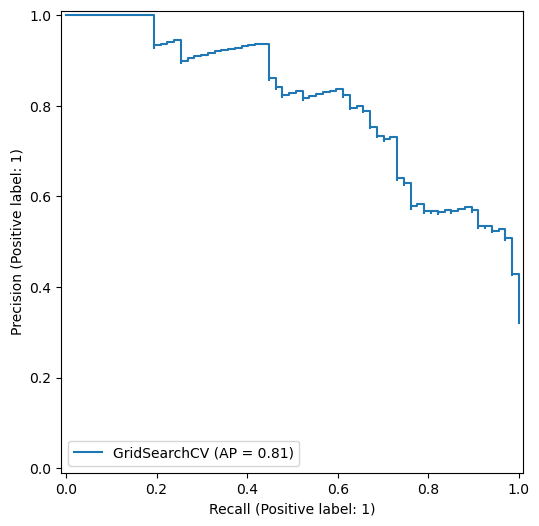

In [47]:
PrecisionRecallDisplay.from_estimator(grid_model, X_train_scaled, y_train);

In [48]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:, 1])

0.8074253771887194

In [49]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:, 1])

In [50]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls)) #buda formülü aslında f1 skorun formülü
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6233894655971951

In [51]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [52]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[56  5]
 [ 8 21]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        61
           1       0.81      0.72      0.76        29

    accuracy                           0.86        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.85      0.86      0.85        90



In [53]:
from ipywidgets import interactive, FloatSlider
from IPython.display import display

In [54]:
y_pred = grid_model.predict(X_test_scaled)
y_pred_proba = grid_model.predict_proba(X_test_scaled)

In [55]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold
def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    for train_index, test_index in skf.split(X, y):
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [56]:
model = LogisticRegression(C = 0.1, class_weight = "balanced", penalty = "l1", solver = "liblinear")
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      80.40%  std 7.16%
Precision-1   72.05%  std 14.42%
Recall-1      70.71%  std 16.77%
F1_score-1    69.41%  std 10.54%


# SVM

In [57]:
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', random_state=42)

In [58]:
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[51 10]
 [ 8 21]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        61
           1       0.68      0.72      0.70        29

    accuracy                           0.80        90
   macro avg       0.77      0.78      0.77        90
weighted avg       0.80      0.80      0.80        90


Train_Set
[[128  14]
 [  7  60]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       142
           1       0.81      0.90      0.85        67

    accuracy                           0.90       209
   macro avg       0.88      0.90      0.89       209
weighted avg       0.90      0.90      0.90       209



In [68]:
from sklearn.model_selection import cross_validate

model = SVC(class_weight='balanced', random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.637
test_recall      0.712
test_f1          0.658
test_accuracy    0.775
dtype: float64

In [60]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [61]:
param_grid = {"C": [0.01, 0.1, 1, 10],
              "kernel": ["linear", "rbf", "sigmoid"], 
              "gamma": ["scale", "auto", 1, 0.1],
             "degree":[1, 3]}

In [62]:
svm_grid = GridSearchCV(svm_model, param_grid)
svm_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced', random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3],
                         'gamma': ['scale', 'auto', 1, 0.1],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [63]:
eval_metric(svm_grid, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 0 61]
 [ 0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.32      1.00      0.49        29

    accuracy                           0.32        90
   macro avg       0.16      0.50      0.24        90
weighted avg       0.10      0.32      0.16        90


Train_Set
[[  0 142]
 [  0  67]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.32      1.00      0.49        67

    accuracy                           0.32       209
   macro avg       0.16      0.50      0.24       209
weighted avg       0.10      0.32      0.16       209



In [66]:
svm_grid.best_estimator_

SVC(C=1, class_weight='balanced', degree=1, kernel='sigmoid', random_state=42)

In [72]:
model = SVC(C=1, class_weight='balanced', degree=1, kernel='sigmoid', random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores_svm = pd.DataFrame(scores, index = range(1, 11))
df_scores_svm.mean()[2:]

test_precision   0.638
test_recall      0.771
test_f1          0.685
test_accuracy    0.765
dtype: float64

# Decision Tree

In [106]:
dtree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dtree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [107]:
eval_metric(dtree_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56  5]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        61
           1       0.81      0.76      0.79        29

    accuracy                           0.87        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.87      0.87      0.87        90


Train_Set
[[142   0]
 [  0  67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        67

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



In [108]:
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.657
test_recall      0.540
test_f1          0.582
test_accuracy    0.756
dtype: float64

In [164]:
dtree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [165]:
param_grid = {'max_features':[4, 'sqrt', None],
             'max_depth':[2, 3, None, 5],
             'min_samples_split':[2,4],
             'min_samples_leaf': [1, 2,3,4],
             'class_weight':['balanced']}

In [166]:
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_grid = GridSearchCV(dtree_model, param_grid, scoring = "recall", n_jobs = -1)

dtree_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [2, 3, None, 5],
                         'max_features': [4, 'sqrt', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4]},
             scoring='recall')

In [167]:
eval_metric(dtree_grid, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[61  0]
 [29  0]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        61
           1       0.00      0.00      0.00        29

    accuracy                           0.68        90
   macro avg       0.34      0.50      0.40        90
weighted avg       0.46      0.68      0.55        90


Train_Set
[[142   0]
 [ 67   0]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       142
           1       0.00      0.00      0.00        67

    accuracy                           0.68       209
   macro avg       0.34      0.50      0.40       209
weighted avg       0.46      0.68      0.55       209



In [168]:
dtree_grid.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)

In [73]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores_dtree = pd.DataFrame(scores, index = range(1, 11))
df_scores_dtree.mean()[2:]

test_precision   0.600
test_recall      0.779
test_f1          0.667
test_accuracy    0.755
dtype: float64

# Random Forest

In [119]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [120]:
eval_metric(rf_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[57  4]
 [ 8 21]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        61
           1       0.84      0.72      0.78        29

    accuracy                           0.87        90
   macro avg       0.86      0.83      0.84        90
weighted avg       0.87      0.87      0.86        90


Train_Set
[[142   0]
 [  0  67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        67

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



In [121]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(class_weight='balanced', random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.769
test_recall      0.600
test_f1          0.663
test_accuracy    0.808
dtype: float64

In [126]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [137]:
param_grid = {'n_estimators':[64, 100, 128],
             'max_features':[4, 'sqrt'],
             'max_depth':[2, 3, None, 5],
             'min_samples_split':[2,4],
             'min_samples_leaf': [1, 2,3,4],
             'max_samples':[0.8, 1, None],
             'class_weight':['balanced']}

In [138]:
rf_model = RandomForestClassifier(random_state=42)
RF_grid = GridSearchCV(rf_model, param_grid, scoring = "recall", n_jobs = -1)

RF_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [2, 3, None, 5],
                         'max_features': [4, 'sqrt'],
                         'max_samples': [0.8, 1, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [64, 100, 128]},
             scoring='recall')

In [141]:
eval_metric(RF_grid, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 0 61]
 [ 0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.32      1.00      0.49        29

    accuracy                           0.32        90
   macro avg       0.16      0.50      0.24        90
weighted avg       0.10      0.32      0.16        90


Train_Set
[[  0 142]
 [  0  67]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.32      1.00      0.49        67

    accuracy                           0.32       209
   macro avg       0.16      0.50      0.24       209
weighted avg       0.10      0.32      0.16       209



In [143]:
RF_grid.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=2, max_samples=0.8,
                       min_samples_leaf=2, random_state=42)

In [74]:
from sklearn.model_selection import cross_validate
rf_model = RandomForestClassifier(class_weight='balanced', max_depth=2, max_samples=0.8,
                       min_samples_leaf=2, random_state=42)
scores = cross_validate(rf_model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores_rf = pd.DataFrame(scores, index = range(1, 11))
df_scores_rf.mean()[2:]

test_precision   0.733
test_recall      0.702
test_f1          0.706
test_accuracy    0.818
dtype: float64

# XGBoost

In [109]:
xgb_model = XGBClassifier(class_weight='balanced', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [110]:
eval_metric(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[55  6]
 [11 18]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        61
           1       0.75      0.62      0.68        29

    accuracy                           0.81        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.81      0.81      0.81        90


Train_Set
[[142   0]
 [  0  67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        67

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



In [111]:
from sklearn.model_selection import cross_validate

model = XGBClassifier(class_weight='balanced', random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.746
test_recall      0.626
test_f1          0.671
test_accuracy    0.809
dtype: float64

In [132]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'class_weight': 'balanced'}

In [145]:
param_grid = {'n_estimators':[64, 100, 128],
             'max_depth':[2, 3, None, 5],
             "learning_rate": [0.01, 0.05, 0.1],
             "subsample": [0.5, 0.8],
             "colsample_bytree": [0.5, 0.8, None]}

In [146]:
xgb_model = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "recall", n_jobs = -1)

xgb_grid.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.8, None],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, None, 5],
                         'n_estimators': [64, 100, 128],
                         'subsample': [0.5, 0.8]},
             scoring='recall')

In [147]:
eval_metric(xgb_grid, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 0 61]
 [ 0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.32      1.00      0.49        29

    accuracy                           0.32        90
   macro avg       0.16      0.50      0.24        90
weighted avg       0.10      0.32      0.16        90


Train_Set
[[  0 142]
 [  0  67]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.32      1.00      0.49        67

    accuracy                           0.32       209
   macro avg       0.16      0.50      0.24       209
weighted avg       0.10      0.32      0.16       209



In [148]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=64, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [75]:
from sklearn.model_selection import cross_validate

model = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1,  max_depth=3, n_estimators=64, random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores_xgb = pd.DataFrame(scores, index = range(1, 11))
df_scores_xgb.mean()[2:]

test_precision   0.777
test_recall      0.626
test_f1          0.673
test_accuracy    0.818
dtype: float64

# Gradient Boosting

In [150]:
grad_model = GradientBoostingClassifier(random_state=42)
grad_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [151]:
eval_metric(grad_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[54  7]
 [10 19]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        61
           1       0.73      0.66      0.69        29

    accuracy                           0.81        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.81      0.81      0.81        90


Train_Set
[[142   0]
 [  0  67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        67

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



In [152]:
from sklearn.model_selection import cross_validate

model = GradientBoostingClassifier( random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.715
test_recall      0.614
test_f1          0.653
test_accuracy    0.795
dtype: float64

In [154]:
grad_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [159]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "subsample": [1.0, 0.5, 0.8],
    "max_features": [None, 2, 3],
    "learning_rate": [0.01, 0.1, 0.5],
    "max_depth": [2, 3, 4]
}

In [160]:
grad_model = GradientBoostingClassifier(random_state=42)
grad_grid = GridSearchCV(grad_model, param_grid, scoring = "recall", n_jobs = -1)

grad_grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [2, 3, 4], 'max_features': [None, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [1.0, 0.5, 0.8]},
             scoring='recall')

In [161]:
eval_metric(grad_grid, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 0 61]
 [ 0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.32      1.00      0.49        29

    accuracy                           0.32        90
   macro avg       0.16      0.50      0.24        90
weighted avg       0.10      0.32      0.16        90


Train_Set
[[  0 142]
 [  0  67]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.32      1.00      0.49        67

    accuracy                           0.32       209
   macro avg       0.16      0.50      0.24       209
weighted avg       0.10      0.32      0.16       209



In [162]:
grad_grid.best_estimator_

GradientBoostingClassifier(max_depth=2, random_state=42, subsample=0.5)

In [76]:
from sklearn.model_selection import cross_validate

model = GradientBoostingClassifier(max_depth=2, random_state=42, subsample=0.5)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores_grad = pd.DataFrame(scores, index = range(1, 11))
df_scores_grad.mean()[2:]

test_precision   0.746
test_recall      0.640
test_f1          0.677
test_accuracy    0.813
dtype: float64

# Comparing Scores

In [87]:
import pandas as pd

# Data for each model


df_scores_log = pd.DataFrame({
    'test_precision': [0.571],
    'test_recall': [0.833],
    'test_f1': [0.670],
    'test_accuracy': [0.727]
}, index=['log'])
    
    
df_scores_svm = pd.DataFrame({
    'test_precision': [0.638],
    'test_recall': [0.771],
    'test_f1': [0.685],
    'test_accuracy': [0.765]
}, index=['svm'])
    
    
df_scores_dtree = pd.DataFrame({
    'test_precision': [0.600],
    'test_recall': [0.779],
    'test_f1': [0.667],
    'test_accuracy': [0.755]
}, index=['dtree'])    
    

    
df_scores_rf = pd.DataFrame({
    'test_precision': [0.733],
    'test_recall': [0.702],
    'test_f1': [0.706],
    'test_accuracy': [0.818]
}, index=['rf'])   
    

df_scores_xgb = pd.DataFrame({
    'test_precision': [0.777],
    'test_recall': [0.626],
    'test_f1': [0.673],
    'test_accuracy': [0.818]
}, index=['xgb'])

    
df_scores_grad = pd.DataFrame({
    'test_precision': [0.746],
    'test_recall': [0.640],
    'test_f1': [0.677],
    'test_accuracy': [0.813]
}, index=['grad'])



# Combine DataFrames into a single DataFrame
df_combined = pd.concat([df_scores_log, df_scores_svm, df_scores_dtree, df_scores_rf, df_scores_xgb, df_scores_grad], axis=0)
df_combined


# Create more DataFrames similarly for other models


test_precision  test_recall  test_f1  test_accuracy
log             0.571        0.833    0.670          0.727
svm             0.638        0.771    0.685          0.765
dtree           0.600        0.779    0.667          0.755
rf              0.733        0.702    0.706          0.818
xgb             0.777        0.626    0.673          0.818
grad            0.746        0.640    0.677          0.813

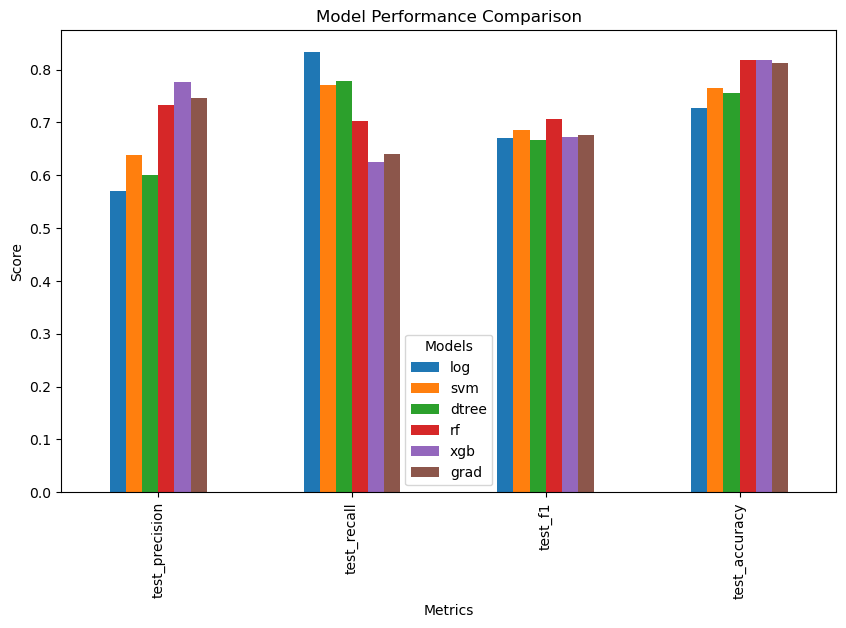

In [88]:
import matplotlib.pyplot as plt

# Plot comparison
df_combined.T.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(title='Models')
plt.show()


# Final Model

In [89]:
final_model = LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')
final_model.fit(X,y)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [91]:
import joblib
import pickle

# Save model using joblib
joblib.dump(final_model, 'final_model.joblib')

# Load model using joblib
loaded_model = joblib.load('final_model.joblib')

# # Save model using pickle
# with open('final_model.pkl', 'wb') as file:
#     pickle.dump(final_model, file)

# # Load model using pickle
# with open('final_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

In [96]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [97]:
test = df.sample(n=10, random_state=42) 

In [107]:
X = test.drop(["DEATH_EVENT"], axis=1)
y = test.DEATH_EVENT

In [113]:
y = 

281    0
265    0
164    1
9      1
77     0
278    0
93     1
109    0
5      1
173    0
Name: DEATH_EVENT, dtype: int64

In [117]:
prediction = final_model.predict(X)

In [118]:
predict_proba = final_model.predict_proba(X)

In [122]:
predict_proba

array([[0.82024263, 0.17975737],
       [0.96352927, 0.03647073],
       [0.62843661, 0.37156339],
       [0.00113876, 0.99886124],
       [0.64952487, 0.35047513],
       [0.9466803 , 0.0533197 ],
       [0.20321192, 0.79678808],
       [0.73448339, 0.26551661],
       [0.0346669 , 0.9653331 ],
       [0.59596702, 0.40403298]])

In [119]:
result = pd.DataFrame(prediction, columns=['prediction'])

In [120]:
result['actual'] = y.values

In [124]:
prob_df = pd.DataFrame(predict_proba, columns=['prob_0', 'prob_1'])

In [125]:
# Concatenate the probability DataFrame with the result DataFrame
result = pd.concat([result, prob_df], axis=1)
result

prediction  actual  prob_0  prob_1
0           0       0   0.820   0.180
1           0       0   0.964   0.036
2           0       1   0.628   0.372
3           1       1   0.001   0.999
4           0       0   0.650   0.350
5           0       0   0.947   0.053
6           1       1   0.203   0.797
7           0       0   0.734   0.266
8           1       1   0.035   0.965
9           0       0   0.596   0.404